### Preparando o ambiente

In [1]:
# Montando o Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# direciona para o caminho desejado
%cd /content/drive/MyDrive/PRETALAB/Análise \de \Dados/Aula01

/content/drive/MyDrive/PRETALAB/Análise de Dados/Aula01


In [3]:
#Este módulo fornece uma maneira simples de usar funcionalidades que são dependentes de sistema operacional
import os

# os.getcwd() retorna o caminho absoluto do diretório de trabalho atual
print(os.getcwd())

/content/drive/MyDrive/PRETALAB/Análise de Dados/Aula01


In [6]:
# Mostra o conteudo do local/pasta
!ls

'Cópia de aula1.ipynb'


## Cenário

**Análise de Satisfação de Clientes em uma Plataforma de E-commerce**

Vamos trabalhar com uma base de dados de satisfação de clientes retirada do Kaggle. Nosso objetivo é aplicar conceitos já estudado:

1. Manipulação de dados,
2. banco de dados,
3. Estatística descritiva,
4. probabilidade e testes de hipóteses




**Sobre o Conjunto de Dados**

***Conjunto de Dados Público de E-commerce Brasileiro da Olist***


Este é um conjunto de dados público de pedidos feitos na Olist, uma loja de e-commerce brasileira. O conjunto de dados contém informações sobre 100 mil pedidos realizados entre 2016 e 2018 em diversos marketplaces no Brasil. Suas características permitem visualizar um pedido a partir de várias dimensões: desde o status do pedido, preço, pagamento e desempenho de frete até a localização do cliente, atributos do produto e, por fim, avaliações escritas pelos clientes. Também disponibilizamos um conjunto de dados de geolocalização que relaciona os CEPs brasileiros com coordenadas de latitude/longitude.

Esses são dados comerciais reais, foram anonimizados e as referências a empresas e parceiros nos textos de avaliação foram substituídas pelos nomes das grandes casas de Game of Thrones.

Integração com o Funil de Marketing da Olist

Também liberamos um Conjunto de Dados do Funil de Marketing. Você pode unir ambos os conjuntos de dados e agora ver um pedido pela perspectiva de Marketing!

As instruções para realizar a junção estão disponíveis neste Kernel.


***Contexto***

Este conjunto de dados foi gentilmente fornecido pela Olist, a maior loja de departamentos nos marketplaces brasileiros. A Olist conecta pequenos negócios de todo o Brasil a canais de vendas de forma simples e com um único contrato. Esses comerciantes podem vender seus produtos através da Olist e enviá-los diretamente aos clientes usando parceiros logísticos da Olist. Veja mais em nosso site: www.olist.com.

Após um cliente comprar um produto na Olist, o vendedor é notificado para atender o pedido. Quando o cliente recebe o produto, ou quando a data de entrega estimada chega ao fim, o cliente recebe uma pesquisa de satisfação por e-mail, onde pode dar uma nota para a experiência de compra e deixar alguns comentários.

Atenção

Um pedido pode conter múltiplos itens.
Cada item pode ser atendido por um vendedor diferente.


## Etapa 1: Manipulação de Arquivos e Módulos em Python

In [7]:
!pip install kaggle

In [8]:
import os
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sqlite3
import numpy as np

Dataset  Conjunto de Dados Público de E-commerce Brasileiro da Olist

In [9]:
import kagglehub

# Download selected version
path = kagglehub.dataset_download("olistbr/brazilian-ecommerce/versions/7")

print("Path to dataset files:", path)

100%|██████████| 42.7M/42.7M [00:00<00:00, 72.1MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/olistbr/brazilian-ecommerce/versions/7


In [10]:
# Carregando a base de clientes
customers = pd.read_csv('/root/.cache/kagglehub/datasets/olistbr/brazilian-ecommerce/versions/7/olist_customers_dataset.csv')

# Carregando a base de pedidos
orders = pd.read_csv('/root/.cache/kagglehub/datasets/olistbr/brazilian-ecommerce/versions/7/olist_orders_dataset.csv')

# Carregando a base de itens vendidos
order_items = pd.read_csv('/root/.cache/kagglehub/datasets/olistbr/brazilian-ecommerce/versions/7/olist_order_items_dataset.csv')

# Carregando a base de marketing e reviews (satisfação)
marketing_reviews = pd.read_csv('/root/.cache/kagglehub/datasets/olistbr/brazilian-ecommerce/versions/7/olist_order_reviews_dataset.csv')

reviews = pd.read_csv('/root/.cache/kagglehub/datasets/olistbr/brazilian-ecommerce/versions/7/olist_order_reviews_dataset.csv')

In [15]:
# Verificando valores faltantes
print(customers.isnull().sum())

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


In [16]:
# Verificar a base clientes
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [17]:
# Verificando valores faltantes
print(orders.isnull().sum())

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date       0
order_estimated_delivery_date       0
dtype: int64


In [18]:
# Verificar a base pedidos
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [25]:
# Análise Descritiva
orders.describe()

,delivery_time_days
count,99441.000000
mean,13.798373
std,40.947699
min,-553.000000
25%,6.000000
50%,10.000000
75%,16.000000
max,692.000000


In [26]:
# Verificar tipo de dados
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       99441 non-null  object 
 1   customer_id                    99441 non-null  object 
 2   order_status                   99441 non-null  object 
 3   order_purchase_timestamp       99441 non-null  object 
 4   order_approved_at              99281 non-null  object 
 5   order_delivered_carrier_date   97658 non-null  object 
 6   order_delivered_customer_date  99441 non-null  object 
 7   order_estimated_delivery_date  99441 non-null  object 
 8   delivery_time_days             99441 non-null  float64
dtypes: float64(1), object(8)
memory usage: 6.8+ MB


In [19]:
# Verificando valores faltantes
print(order_items.isnull().sum())

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


In [20]:
# Verificar a base itens
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [21]:
# Verificando valores faltantes
print(reviews.isnull().sum())

review_id                      0
order_id                       0
review_score                   0
review_comment_title       88285
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64


In [22]:
# Verificar a base review
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [13]:
# Tratamento de dados: preenchendo valores faltantes
customers.fillna('Unknown', inplace=True)
orders['order_delivered_customer_date'].fillna(method='ffill', inplace=True)

<ipython-input-13-fecaf77f9d68>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  orders['order_delivered_customer_date'].fillna(method='ffill', inplace=True)
<ipython-input-13-fecaf77f9d68>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  orders['order_delivered_customer_date'].fillna(method='ffill', inplace=True)


In [23]:
# Exemplo de transformação usando Numpy - criando uma coluna de dias para entrega
orders['delivery_time_days'] = np.where(orders['order_delivered_customer_date'].notnull(),
                                        (pd.to_datetime(orders['order_delivered_customer_date']) -
                                         pd.to_datetime(orders['order_purchase_timestamp'])).dt.days,
                                        np.nan)

In [24]:
# Verificando os dados transformados
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time_days
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,8.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,13.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,9.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,13.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2.0


Segundo dataset são vendas realizadas na plataforma.

## Passo 2: Criar e inserir dados no banco de dados SQLite

Vamos alimentar um banco de dados SQLite com os  datasets. A vantagem disso é que podemos realizar consultas complexas para responder a perguntas de negócio de forma eficiente, como entender quais campanhas geraram mais vendas ou os padrões de comportamento dos clientes.

**Criando e populando o banco de dados SQLite:**


In [27]:
# Conectar ao banco de dados SQLite (ou criar, se não existir)
conn = sqlite3.connect('olist_marketing_sales.db')
cursor = conn.cursor()

In [28]:
# Criar tabelas no banco de dados para armazenar os dados
customers.to_sql('customers', conn, if_exists='replace', index=False)
orders.to_sql('orders', conn, if_exists='replace', index=False)
order_items.to_sql('order_items', conn, if_exists='replace', index=False)
reviews.to_sql('reviews', conn, if_exists='replace', index=False)

100000

In [29]:
# Conferir se as tabelas foram criadas corretamente
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[('customers',), ('orders',), ('order_items',), ('reviews',)]


In [34]:
# Conferir tabela cliente
cursor.execute("SELECT * FROM customers")
print(cursor.fetchall())

Output hidden; open in https://colab.research.google.com to view.

In [35]:
# Commitar as mudanças e fechar a conexão
conn.commit()
conn.close()

 Esse cruzamento vai permitir entendermos, por exemplo, quais tipos de campanhas de marketing resultaram em maiores vendas ou em uma melhor retenção de clientes.

## Passo 3: Consultas SQL para cruzar os dados

Agora que temos ambos os datasets no banco de dados SQLite, podemos começar a cruzar as informações de marketing e vendas para analisar como as campanhas impactaram as vendas.

In [36]:
# Reabrir conexão com o banco de dados
conn = sqlite3.connect('olist_marketing_sales.db')
cursor = conn.cursor()

In [37]:
# Consultar as vendas que foram impactadas por campanhas
# Consulta SQL para cruzar vendas, clientes e avaliações
query = '''
    SELECT c.customer_id, o.order_id, oi.product_id, r.review_score, o.order_purchase_timestamp
    FROM orders o
    JOIN customers c ON o.customer_id = c.customer_id
    JOIN order_items oi ON o.order_id = oi.order_id
    JOIN reviews r ON o.order_id = r.order_id
    WHERE r.review_score IS NOT NULL;
'''

In [38]:
# Executar a consulta e armazenar o resultado em um DataFrame
df_crossed_data = pd.read_sql_query(query, conn)

print("Dados Cruzados:")
print(df_crossed_data.head())

Dados Cruzados:
                        customer_id                          order_id  \
0  41dcb106f807e993532d446263290104  73fc7af87114b39712e6da79b0a377eb   
1  41dcb106f807e993532d446263290104  73fc7af87114b39712e6da79b0a377eb   
2  8a2e7ef9053dea531e4dc76bd6d853e6  a548910a1c6147796b98fdf73dbeba33   
3  e226dfed6544df5b7b87a48208690feb  f9e4b658b201a9f2ecdecbb34bed034b   
4  de6dff97e5f1ba84a3cd9a3bc97df5f6  658677c97b385a9be170737859d3511b   

                         product_id  review_score order_purchase_timestamp  
0  fd25ab760bfbba13c198fa3b4f1a0cd3             4      2018-01-11 15:30:49  
1  fd25ab760bfbba13c198fa3b4f1a0cd3             4      2018-01-11 15:30:49  
2  be0dbdc3d67d55727a65d4cd696ca73c             5      2018-02-28 12:25:19  
3  d1c427060a0f73f6b889a5c7c61f2ac4             5      2018-02-03 09:56:22  
4  52c80cedd4e90108bf4fa6a206ef6b03             5      2017-04-09 17:41:13  


In [39]:
# Fechar conexão com o banco
conn.close()

## Passo 4: Análise e visualização dos dados

Agora, com o cruzamento dos dados pronto, podemos realizar a análise estatística e as visualizações necessárias para entender melhor o impacto das campanhas nas vendas.

Análise Estatística (Testes de Hipóteses, Probabilidade e Amostragem):
Probabilidade e Distribuições:
Qual a probabilidade de uma campanha específica resultar em uma venda?
Qual a taxa de conversão por campanha?

In [40]:
# Calcular a probabilidade de uma campanha resultar em uma venda positiva (review_score > 3)
vendas_positivas = len(df_crossed_data[df_crossed_data['review_score'] > 3])
total_vendas = len(df_crossed_data)
prob_venda = (vendas_positivas / total_vendas) * 100

print(f'Probabilidade de uma campanha resultar em venda positiva: {prob_venda:.2f}%')

Probabilidade de uma campanha resultar em venda positiva: 75.01%


**Testes de Hipóteses (ANOVA):**

Vamos usar ANOVA para verificar se existe uma diferença significativa nas avaliações entre diferentes tipos de campanhas (supondo que temos dados de tipo de campanha).

In [41]:
from scipy import stats

In [42]:
# Supondo que temos uma coluna 'campaign_type' na tabela de Marketing
# Aqui, apenas para fins de exemplo, adicionamos uma coluna fictícia de tipo de campanha
# Em um cenário real, essa coluna deve estar presente nos dados

# Adicionar coluna fictícia de tipo de campanha para exemplo
np.random.seed(42)
campaign_types = ['Email', 'Social Media', 'Google Ads']
df_crossed_data['campaign_type'] = np.random.choice(campaign_types, size=len(df_crossed_data))

In [43]:
# Realizar ANOVA para comparar a média de avaliações de diferentes tipos de campanha
anova_result = stats.f_oneway(
    df_crossed_data[df_crossed_data['campaign_type'] == 'Email']['review_score'],
    df_crossed_data[df_crossed_data['campaign_type'] == 'Social Media']['review_score'],
    df_crossed_data[df_crossed_data['campaign_type'] == 'Google Ads']['review_score']
)

print(f'Resultado ANOVA: Estatística F = {anova_result.statistic:.4f}, Valor-p = {anova_result.pvalue:.4f}')

Resultado ANOVA: Estatística F = 2.1279, Valor-p = 0.1191


In [44]:
# Interpretação
if anova_result.pvalue < 0.05:
    print("Rejeitamos a hipótese nula: há uma diferença significativa nas avaliações entre os tipos de campanha.")
else:
    print("Não rejeitamos a hipótese nula: não há diferença significativa nas avaliações entre os tipos de campanha.")

Não rejeitamos a hipótese nula: não há diferença significativa nas avaliações entre os tipos de campanha.


## Passo 5:Análise da Satisfação do Cliente para Vendas Impactadas

Vamos verificar se as vendas impactadas pelas campanhas têm avaliações mais positivas, indicando maior satisfação dos clientes.

In [45]:
# Filtrar vendas impactadas por campanhas (review_score > 3)
vendas_impactadas = df_crossed_data[df_crossed_data['review_score'] > 3]

In [46]:
# Calcular a média das avaliações para vendas impactadas
media_satisfacao = vendas_impactadas['review_score'].mean()
print(f'Média de satisfação dos clientes impactados por campanhas: {media_satisfacao:.2f}')

Média de satisfação dos clientes impactados por campanhas: 4.75


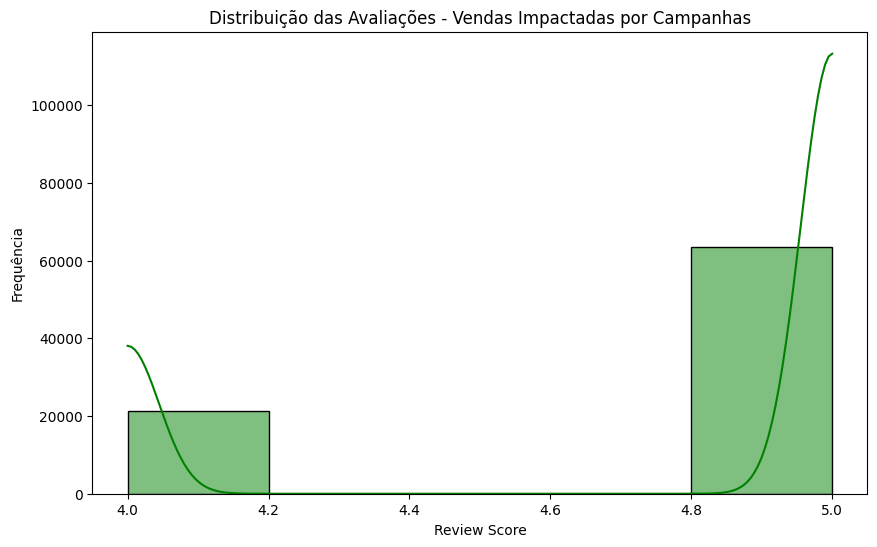

In [47]:
plt.figure(figsize=(10, 6))
sns.histplot(vendas_impactadas['review_score'], bins=5, kde=True, color='green')
plt.title('Distribuição das Avaliações - Vendas Impactadas por Campanhas')
plt.xlabel('Review Score')
plt.ylabel('Frequência')
plt.show()

## Passo 6: Cálculo da Taxa de Conversão Geral

In [48]:
# Conectar ao banco de dados novamente
conn = sqlite3.connect('olist_marketing_sales.db')

In [49]:
# Consultar o total de clientes
query_total_clients = 'SELECT COUNT(*) FROM customers;'
total_clientes = pd.read_sql_query(query_total_clients, conn).iloc[0,0]

In [50]:
# Consultar o número de clientes que realizaram pelo menos uma compra
query_clientes_compras = '''
    SELECT COUNT(DISTINCT customer_id)
    FROM orders;
'''

In [51]:
clientes_compras = pd.read_sql_query(query_clientes_compras, conn).iloc[0,0]

In [52]:
# Calcular a taxa de conversão geral
taxa_conversao_geral = (clientes_compras / total_clientes) * 100
print(f'Taxa de Conversão Geral: {taxa_conversao_geral:.2f}%')

Taxa de Conversão Geral: 100.00%


In [53]:
# Fechar a conexão
conn.close()